In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
Absents = pd.read_csv("train_data.csv")
X_test  = pd.read_csv("test_data.csv")
Y_test  = pd.read_csv("sample_submission.csv")

In [165]:
Absents

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absent
0,1,26,7,3,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
1,2,0,7,3,1,118,13,18,50,"239,554",...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,"239,554",...,0,1,0,1,0,0,89,170,31,1
3,4,7,7,5,1,279,5,14,39,"239,554",...,0,1,2,1,1,0,68,168,24,1
4,5,23,7,5,1,289,36,13,33,"239,554",...,0,1,2,1,0,1,90,172,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,28,9,3,1,246,25,16,41,"261,756",...,0,1,0,1,0,0,67,170,23,0
496,497,28,9,3,1,246,25,16,41,"261,756",...,0,1,0,1,0,0,67,170,23,0
497,498,28,9,3,1,118,10,10,37,"261,756",...,0,1,0,0,0,0,83,172,28,1
498,499,23,9,3,1,155,12,14,34,"261,756",...,0,1,2,1,0,0,95,196,25,1


## Pre tratemento de dados

In [166]:
abs = [x for x in Absents['Absent'] if x == 1]
workload = [int(x.replace(",","")) for x in Absents['Work load Average/day ']]
Absents['Work load Average/day '] = workload

Absents = Absents.drop(columns = 'ID')
X_test  = X_test.drop(columns  = 'ID')

AbsentsY = Absents['Absent'] 
AbsentsX = Absents.drop(columns = 'Absent')
AbsentsX

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239554,97,1,1,1,1,0,0,98,178,31
2,23,7,4,1,179,51,18,38,239554,97,0,1,0,1,0,0,89,170,31
3,7,7,5,1,279,5,14,39,239554,97,0,1,2,1,1,0,68,168,24
4,23,7,5,1,289,36,13,33,239554,97,0,1,2,1,0,1,90,172,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,28,9,3,1,246,25,16,41,261756,87,0,1,0,1,0,0,67,170,23
496,28,9,3,1,246,25,16,41,261756,87,0,1,0,1,0,0,67,170,23
497,28,9,3,1,118,10,10,37,261756,87,0,1,0,0,0,0,83,172,28
498,23,9,3,1,155,12,14,34,261756,87,0,1,2,1,0,0,95,196,25


## Normalizar os dados

In [167]:
from sklearn import preprocessing

def normalize_dataset():
    global AbsentsX,X_testas
    x  = AbsentsX.values 
    x2 = X_test.values
    min_max_scaler = preprocessing.MinMaxScaler()
    scaler    = min_max_scaler.fit(x)
    x_scaled  = scaler.transform(x)
    x2_scaled = scaler.transform(x2)
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test [x] = df2[i]
        i+=1


        
def standardize_dataset():
    global AbsentsX,X_test
    x  =  AbsentsX.values
    x2 = X_test.values
    standart_scaler = preprocessing.StandardScaler()
    scaler = standart_scaler.fit(x)
    x_scaled  = scaler.transform(x)
    x2_scaled = scaler.transform(x2) 
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test[x]  = df2[i]
        i+=1
        
def binarize_dataset():
    global AbsentsX,X_test
    x  =  AbsentsX.values
    x2 = X_test.values
    Binarizer = preprocessing.Binarizer()
    binarizer = Binarizer.fit(x)
    x_scaled  = binarizer.transform(x)
    x2_scaled = binarizer.transform(x2) 
    df  = pd.DataFrame(x_scaled)
    df2 = pd.DataFrame(x2_scaled)

    i = 0
    for x in AbsentsX:
        AbsentsX[x] = df[i]
        X_test[x]  = df2[i]
        i+=1


##binarize_dataset()
normalize_dataset()
##standardize_dataset()
AbsentsX

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
1,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.576923,0.741935,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.0,0.807692,0.454545,0.631579
2,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.576923,0.354839,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.0,0.634615,0.212121,0.631579
3,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.423077,0.387097,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.0,0.230769,0.151515,0.263158
4,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.384615,0.193548,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526
496,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.500000,0.451613,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211538,0.212121,0.210526
497,1.000000,0.727273,0.25,0.0,0.000000,0.106383,0.269231,0.322581,0.322830,0.315789,0.0,0.0,0.00,0.0,0.0,0.0,0.519231,0.272727,0.473684
498,0.821429,0.727273,0.25,0.0,0.137037,0.148936,0.423077,0.225806,0.322830,0.315789,0.0,0.0,0.50,1.0,0.0,0.0,0.750000,1.000000,0.315789


In [16]:
X_test

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,0.821429,0.727273,1.00,0.000000,0.225926,0.446809,0.230769,0.096774,0.322830,0.315789,0.0,1.0,0.00,0.0,0.0,0.0,0.000000,0.242424,0.000000
1,0.821429,0.727273,1.00,0.000000,0.481481,0.425532,0.423077,0.645161,0.322830,0.315789,0.0,0.0,0.50,0.0,0.0,0.2,0.576923,0.060606,0.684211
2,0.821429,0.727273,0.00,0.000000,0.225926,0.978723,0.576923,0.354839,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.634615,0.212121,0.631579
3,0.821429,0.727273,0.50,0.000000,0.396296,0.446809,0.230769,0.032258,0.322830,0.315789,0.0,0.0,0.25,0.0,0.0,0.4,0.250000,0.181818,0.263158
4,0.821429,0.727273,0.00,0.000000,0.225926,0.446809,0.230769,0.096774,0.322830,0.315789,0.0,1.0,0.00,0.0,0.0,0.0,0.000000,0.242424,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,0.500000,0.545455,0.25,0.000000,0.633333,0.659574,0.384615,0.193548,0.339296,0.631579,0.0,0.0,0.50,1.0,0.0,0.2,0.653846,0.272727,0.578947
236,0.392857,0.545455,0.25,0.000000,0.433333,0.127660,0.423077,0.322581,0.339296,0.631579,0.0,1.0,0.25,0.0,0.0,0.2,0.615385,0.272727,0.526316
237,0.000000,-0.090909,0.25,0.000000,0.000000,0.191489,0.384615,0.419355,0.377540,0.736842,0.0,0.0,0.25,1.0,0.0,1.6,0.807692,0.212121,0.789474
238,0.000000,-0.090909,0.50,0.333333,0.418519,0.638298,0.423077,0.387097,0.377540,0.736842,0.0,0.0,0.50,1.0,0.0,0.4,0.846154,0.212121,0.842105


## reinserir a coluna absent

In [168]:
AbsentsX.insert(len(AbsentsX.columns),'Absent',AbsentsY)

## Balancear o dataset

In [169]:
def balance_dataset(nr_0,nr_1):
    global AbsentsX
    abs_shuffled = AbsentsX.sample(frac=1,random_state=4)
    A0 = abs_shuffled.loc[abs_shuffled['Absent'] == 1].sample(n=nr_0,random_state=4)
    A1 = abs_shuffled.loc[abs_shuffled['Absent'] == 0].sample(n=nr_1,random_state=4)
    
    balanced_absents = pd.concat([A0,A1])
    AbsentsX = balanced_absents.sample(frac=1,random_state=4)
        
    


A0 = len(AbsentsX[AbsentsX['Absent'] == 0])
A1 = len(AbsentsX[AbsentsX['Absent'] == 1])

nr_elements_dataset = A0

if A1 < A0:
    nr_elements_dataset = A1

print(nr_elements_dataset)
balance_dataset(nr_elements_dataset,nr_elements_dataset)
print(len(AbsentsX))

105
210


## Removemos os outliers

### depois de balancear os dados

In [143]:
for x in AbsentsX:
    print(x)

Reason for absence
Month of absence
Day of the week
Seasons
Transportation expense
Distance from Residence to Work
Service time
Age
Work load Average/day 
Hit target
Disciplinary failure
Education
Son
Social drinker
Social smoker
Pet
Weight
Height
Body mass index
Absent


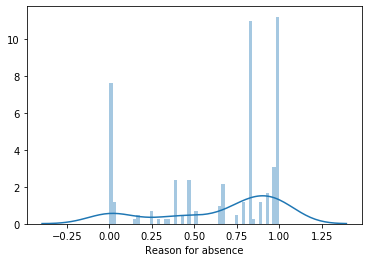

In [144]:
sns.distplot(AbsentsX['Reason for absence'],bins=50)

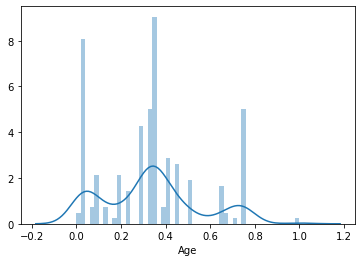

In [145]:
sns.distplot(AbsentsX["Age"],bins=50)

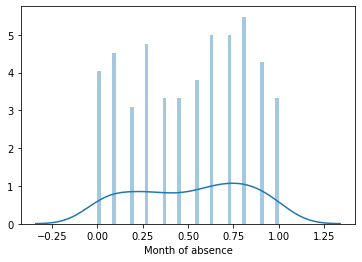

In [146]:
sns.distplot(AbsentsX["Month of absence"],bins=50)

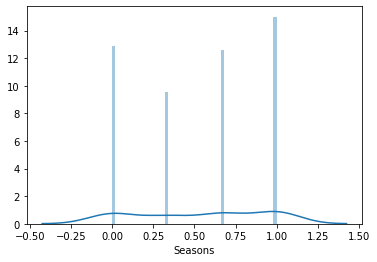

In [147]:
sns.distplot(AbsentsX["Seasons"],bins=50)

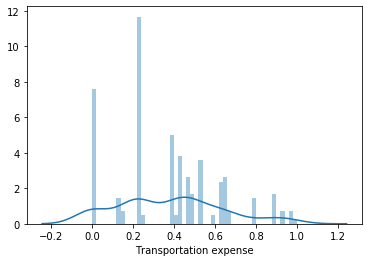

In [148]:
sns.distplot(AbsentsX["Transportation expense"],bins=50)

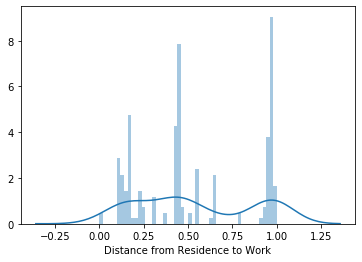

In [149]:
sns.distplot(AbsentsX["Distance from Residence to Work"],bins=50)

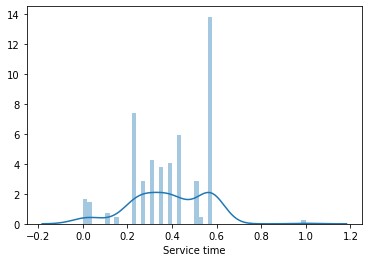

In [150]:
sns.distplot(AbsentsX["Service time"],bins=50)

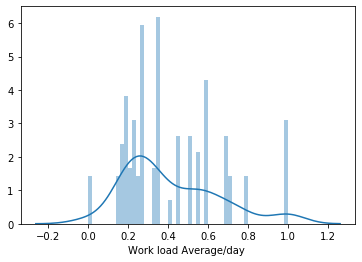

In [151]:
sns.distplot(AbsentsX["Work load Average/day "],bins=50)

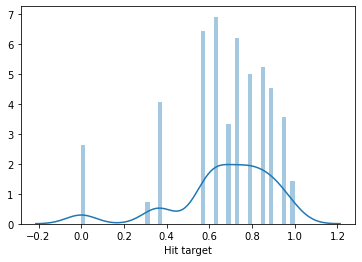

In [152]:
sns.distplot(AbsentsX["Hit target"],bins=50)

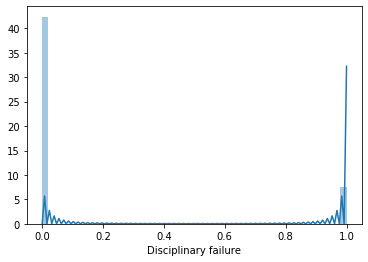

In [153]:
sns.distplot(AbsentsX["Disciplinary failure"],bins=50)

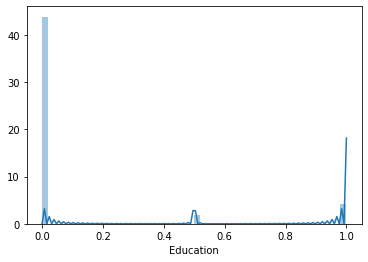

In [154]:
sns.distplot(AbsentsX["Education"],bins=50)

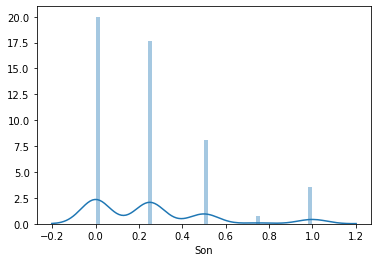

In [155]:
sns.distplot(AbsentsX["Son"],bins=50)

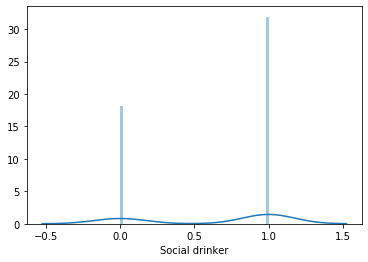

In [156]:
sns.distplot(AbsentsX["Social drinker"],bins=50)

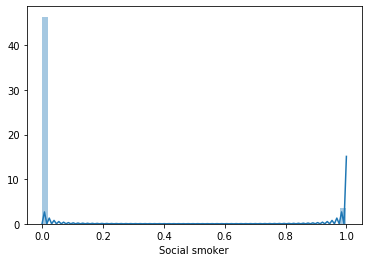

In [157]:
sns.distplot(AbsentsX["Social smoker"],bins=50)

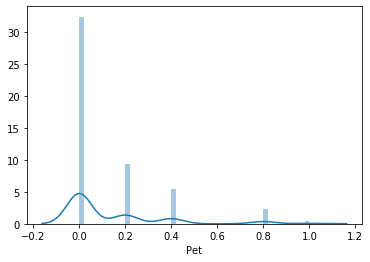

In [158]:
sns.distplot(AbsentsX["Pet"],bins=50)

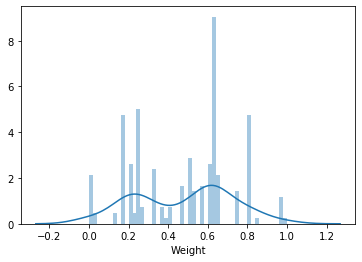

In [159]:
sns.distplot(AbsentsX["Weight"],bins=50)

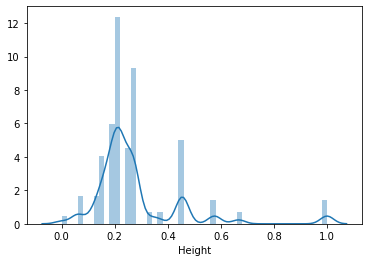

In [160]:
sns.distplot(AbsentsX["Height"],bins=50)

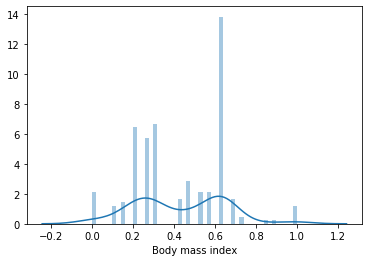

In [161]:
sns.distplot(AbsentsX["Body mass index"],bins=50)

In [171]:
q1 = AbsentsX.quantile(0.975)
q4 = AbsentsX.quantile(0.025)


OUTLIER_COLUMNS = ['Reason for absence',"Age","Transportation expense",
                  "Service time","Work load Average/day ","Hit target",
                  "Weight","Height","Body mass index"]

def remove_outliers(OUTLIER_COLUMNS):
    global AbsentsX
    for i in OUTLIER_COLUMNS:
        AbsentsX = AbsentsX.drop(AbsentsX[AbsentsX[i] > q1[i]].index)
        AbsentsX = AbsentsX.drop(AbsentsX[AbsentsX[i] < q4[i]].index)




remove_outliers(OUTLIER_COLUMNS)

In [173]:
print(len(Absents[Absents['Absent'] == 1]))
print(len(Absents[Absents['Absent'] == 0]))

395
105


178

## Feature selection + extraction
### pca rfe correlacao

[['Reason for absence'], ['Month of absence'], ['Day of the week'], ['Seasons'], ['Transportation expense'], ['Distance from Residence to Work'], ['Service time', 'Age'], ['Work load Average/day '], ['Hit target'], ['Disciplinary failure'], ['Education'], ['Son'], ['Social drinker'], ['Social smoker'], ['Pet'], ['Weight', 'Body mass index'], ['Height']]


,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time + Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight + Body mass index,Height,Absent
0,0.928571,0.545455,0.25,0.0,0.633333,0.659574,0.289082,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.616397,0.272727,1
1,0.000000,0.545455,0.25,0.0,0.000000,0.170213,0.659429,0.194471,0.842105,1.0,0.0,0.25,1.0,0.0,0.0,0.719636,0.454545,0
2,0.821429,0.545455,0.50,0.0,0.225926,0.978723,0.465881,0.194471,0.842105,0.0,0.0,0.00,1.0,0.0,0.0,0.633097,0.212121,1
3,0.250000,0.545455,0.75,0.0,0.596296,0.000000,0.405087,0.194471,0.842105,0.0,0.0,0.50,1.0,1.0,0.0,0.246964,0.151515,1
4,0.821429,0.545455,0.75,0.0,0.633333,0.659574,0.289082,0.194471,0.842105,0.0,0.0,0.50,1.0,0.0,0.2,0.616397,0.272727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.475806,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211032,0.212121,0
496,1.000000,0.727273,0.25,0.0,0.474074,0.425532,0.475806,0.322830,0.315789,0.0,0.0,0.00,1.0,0.0,0.0,0.211032,0.212121,0
497,1.000000,0.727273,0.25,0.0,0.000000,0.106383,0.295906,0.322830,0.315789,0.0,0.0,0.00,0.0,0.0,0.0,0.496457,0.272727,1
498,0.821429,0.727273,0.25,0.0,0.137037,0.148936,0.324442,0.322830,0.315789,0.0,0.0,0.50,1.0,0.0,0.0,0.532895,1.000000,1


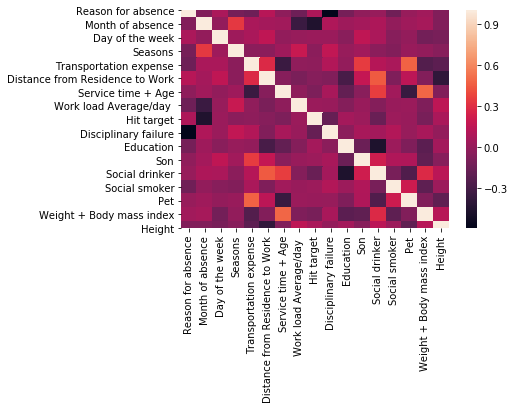

In [136]:
AbsentsY = AbsentsX['Absent']
AbsentsX = AbsentsX.drop(columns="Absent")
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


Columns = [x for x in AbsentsX]

def feature_selectionKBest(nr_features):
    
    global AbsentsX,AbsentsY,X_test
    feature_selector = SelectKBest(chi2,k=nr_features).fit(AbsentsX,AbsentsY)
    
    
    keep_feature = feature_selector.get_support()
    
    droping_columns = [Columns[x] for x in range(len(keep_feature))
                          if keep_feature[x] == 0]
    
    AbsentsX = AbsentsX.drop(columns=droping_columns)
    X_test  = X_test.drop(columns=droping_columns)
    
    

from sklearn.feature_selection import RFE
from sklearn.svm import SVR


def feature_selectionRFE(nr_features):
    
    global AbsentsX,AbsentsY,X_test
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, nr_features, step=1)
    selector = selector.fit(AbsentsX,AbsentsY)
        
    keep_feature = selector.get_support()
    
    droping_columns = [Columns[x] for x in range(len(keep_feature))
                          if keep_feature[x] == 0]
    
    AbsentsX = AbsentsX.drop(columns=droping_columns)
    X_test  = X_test.drop(columns=droping_columns)
    


def featureExtraction(correlation_coefficient):
    global AbsentsX,AbsentsY,X_test,Columns
    correlation = AbsentsX.corr()
    
    new_columns = list()
    
    
    while(len(Columns) > 0):
        copy_columns = list(Columns)
        new_column = list()
        column = Columns[0]
        Columns.remove(column)
        new_column.append(column)
        for i in copy_columns:
            if(i != column):
                if AbsentsX[column].corr(AbsentsX[i]) > correlation_coefficient:
                    new_column.append(i)
                    Columns.remove(i)
        new_columns.append(new_column)
              
    
    for x in new_columns:
        averages = list()
        for index,row in AbsentsX.iterrows():
                average = 0;
                for i in x:
                    average += row[i]
                average = average/len(x)
                averages.append(average)
                            
        AbsentsX = AbsentsX.drop(columns = x)
        AbsentsX.insert(len(AbsentsX.columns)," + ".join(x),averages)    
    
##feature_selectionKBest(8)

##feature_selectionRFE(8)

featureExtraction(0.5)

sns.heatmap(AbsentsX.corr())      
AbsentsX.insert(len(AbsentsX.columns),"Absent",AbsentsY)
AbsentsX


# Modelos

In [174]:
X = AbsentsX.drop(columns= 'Absent')
Y = AbsentsX['Absent']


## LinearRegression
### Area under the curve

In [175]:
from sklearn.linear_model import LinearRegression

In [176]:
##X_test = X_new.transform(X_test)

##X = Absents.drop('Absent',axis = 1)
##Y = Absents['Absent']

lm = LinearRegression(fit_intercept=False,normalize=True,copy_X= False)
lm.fit(X,Y)
predictions = lm.predict(X_test)
from sklearn.metrics import accuracy_score
predictions = [int( x  > 0.5) for x in predictions]
print(predictions)
accuracy_score(Y_test['Absent'],predictions)


[0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]


0.6625

#### Using Gridsearch

In [177]:
param_grid = {'fit_intercept': [True,False], 'normalize': [True,False], 'copy_X': [False,True],'n_jobs': [None,1,2,4,8,16,32]}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(LinearRegression(),param_grid,refit=True,verbose=0)
grid.fit(X,Y)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
grid_predictions = [int( x  > 0.5) for x in grid_predictions]
accuracy_score(Y_test['Absent'],grid_predictions)

C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'copy_X': False, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.6166666666666667

0.8

## Dummy classifier

In [178]:
from sklearn.dummy import DummyClassifier
clf = DummyClassifier(strategy= 'most_frequent')
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.8166666666666667

#### Using Grid search

In [179]:
param_grid = {'strategy': ['stratified','most_frequent',
                          'prior','uniform']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(DummyClassifier(),param_grid,refit=True,verbose=0)
grid.fit(X,Y)
print(grid.best_params_)
grid_predictions = grid.predict(X_test)
accuracy_score(Y_test['Absent'],grid_predictions)

{'strategy': 'uniform'}


C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.4791666666666667

## LogisticRegression

In [180]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'saga')
LR.fit(X,Y)
predictions = LR.predict(X_test)
print(predictions)
accuracy_score(Y_test['Absent'],predictions)


[1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0
 1 0 1 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1
 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 1 1 1]


0.6875

## KMeans

In [181]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
predictions = kmeans.predict(X_test)
print(predictions)
accuracy_score(Y_test['Absent'],predictions)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


0.23333333333333334

## KNN

In [182]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X,Y)
predictions = knn.predict(X_test)
print(predictions)
accuracy_score(Y_test['Absent'],predictions)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 1 1 1
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0]


0.3125

## SVM

In [183]:
from sklearn.svm import SVC
model = SVC(gamma = 'auto')
model.fit(X,Y)
predictions = model.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)


0.8166666666666667

#### Using GridSearch

In [184]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X,Y)
grid.best_params_

C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.517, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.672, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.633, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.633, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ...... C=1000, gamma=0.01, kernel=rbf, score=0.690, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.683, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.667, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.586, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

In [56]:
grid_predictions = grid.predict(X_test)
accuracy_score(Y_test['Absent'],grid_predictions)


0.8166666666666667

## NaiveBayes

In [185]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X,Y)
predictions = classifier.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)


ValueError: Input X must be non-negative

## Perceptron

In [186]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X, Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.26666666666666666

## Multilayer percetron

In [187]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X,Y)

predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.8166666666666667

## Decision Trees

In [188]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.2

## Random Forest Classifier

In [189]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

params_rf = {'n_estimators': [50, 100, 200,400]}

rf_gs = GridSearchCV(rf, params_rf, cv=5)

rf_gs.fit(X, Y)

print(rf_gs.best_params_)
predictions = rf_gs.predict(X_test)

accuracy_score(Y_test['Absent'],predictions)

{'n_estimators': 100}


C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.2833333333333333

## PassiveAgressiveClassifier

In [190]:
from sklearn.linear_model import PassiveAggressiveClassifier
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,
tol=1e-3)
clf.fit(X, Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.19166666666666668

## Nearest Centroid

In [191]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.6625

## RadiusNeighborsClassifier

In [192]:
from sklearn.neighbors import RadiusNeighborsClassifier

clf = RadiusNeighborsClassifier(radius=1.9)
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

ValueError: No neighbors found for test samples [1, 2, 5, 6, 7, 8, 9, 10, 11, 13, 14, 16, 17, 19, 20, 21, 22, 23, 25, 29, 32, 33, 34, 35, 37, 38, 39, 40, 41, 44, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 72, 73, 76, 77, 79, 81, 82, 83, 84, 85, 88, 90, 92, 93, 94, 95, 97, 98, 101, 102, 103, 105, 106, 107, 108, 110, 112, 115, 116, 117, 118, 123, 125, 127, 129, 130, 131, 132, 133, 134, 136, 138, 139, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 156, 159, 162, 163, 165, 166, 169, 170, 172, 173, 174, 175, 176, 178, 180, 181, 182, 183, 184, 185, 186, 188, 190, 191, 192, 194, 198, 199, 200, 201, 202, 203, 204, 206, 210, 211, 212, 213, 214, 216, 218, 221, 224, 225, 226, 232, 235, 237, 238, 239], you can try using larger radius, give a label for outliers, or consider removing them from your dataset.

## Ensemble learning

## Bagging

In [194]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

                            
clf = BaggingClassifier(base_estimator=SVC(gamma='auto'),
                       n_estimators=10, random_state=0)
clf.fit(X, Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.8125

## Stacking
### needs sklearn version 0.23 or  above

In [195]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

ImportError: cannot import name 'StackingClassifier' from 'sklearn.ensemble' (C:\Users\hugoa\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

## AdaBoost

In [196]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

clf = AdaBoostClassifier(n_estimators = 100, random_state=0)
clf.fit(X, Y)
print(clf.feature_importances_)
preditions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

[0.45 0.07 0.01 0.   0.03 0.   0.02 0.01 0.15 0.14 0.01 0.01 0.01 0.
 0.   0.01 0.05 0.03 0.  ]


0.8125

## Voting classifier

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial',solver = 'saga', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

In [198]:
eclf1 = VotingClassifier(estimators=[
         ('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='hard')
eclf1 = eclf1.fit(X.values, Y.values)
preditions = eclf1.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.8125

In [199]:
eclf2 = VotingClassifier(estimators=[
   ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
  voting='soft')
eclf2 = eclf2.fit(X, Y)

preditions = eclf2.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.8125

In [200]:
eclf3 = VotingClassifier(estimators=[
 ('lr', clf1), ('rf', clf2), ('gnb', clf3)],
 voting='soft', weights=[2,1,1],
 flatten_transform=True)
eclf3 = eclf3.fit(X, Y)
predictions = eclf3.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.32916666666666666

## Ensemble Trees Classifier

In [201]:
from sklearn.ensemble import ExtraTreesClassifier

clf = ExtraTreesClassifier(n_estimators=100, random_state=0)
clf.fit(X,Y)
predictions = clf.predict(X_test)
accuracy_score(Y_test['Absent'],predictions)

0.5666666666666667

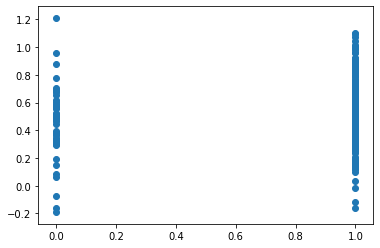

In [16]:
plt.scatter(Y_test['Absent'],predictions)

In [17]:
print(len(Y))
print(len(X))


188
188


[0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [55]:
AbsentsY

0      1
1      0
2      1
3      1
4      1
      ..
495    0
496    0
497    1
498    1
499    1
Name: Absent, Length: 500, dtype: int64

In [3]:
import sklearn

sklearn.__version__

'0.21.3'

# Look at Cross Validation